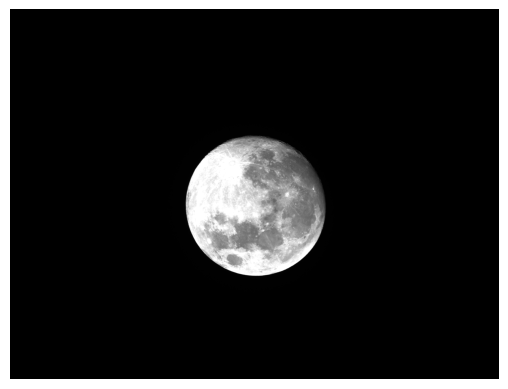

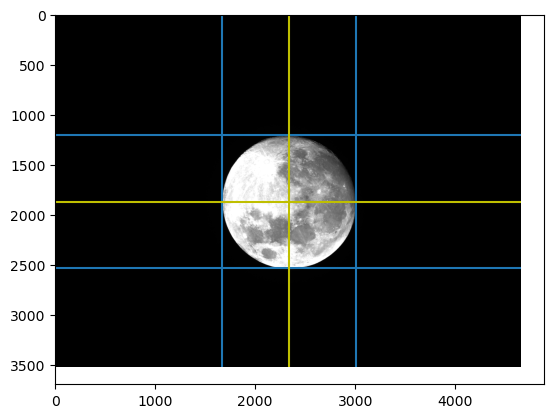

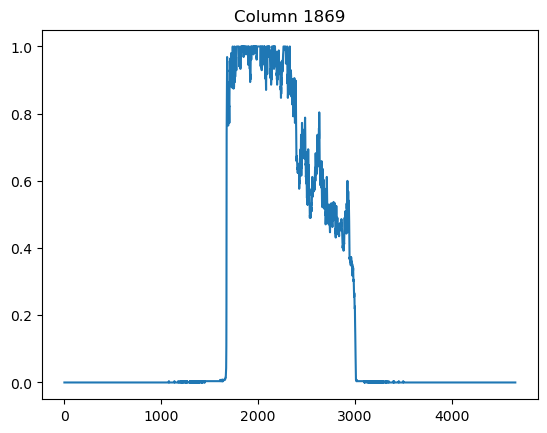

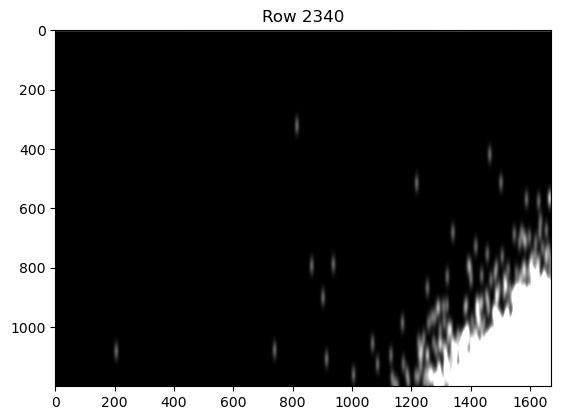

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import random as rng		# import random number generator
from scipy.signal import oaconvolve as convolve  # fast convolution function

# Set data directory for cat photo.
data_directory = "./"
file_name = "full-moon-10ms.PNG"

# Import the photograph using PyPlot.
photo = plt.imread(data_directory + file_name)

plt.figure()
plt.imshow(photo)
plt.gray()
plt.axis('off')

# Get the dimensions of the image.
Imax, Jmax = photo.shape

# Find bounding box for brightest pixels.
# Set a threshold for the edge of the moon.
threshhold = 0.1

# Use Boolean array: True for "moon pixels"
i_vals, j_vals = np.nonzero(photo > threshhold)

# Search indices for edges of the moon.
i_min = min(i_vals)
i_max = max(i_vals)
j_min = min(j_vals)
j_max = max(j_vals)

# Find the center of the moon.
i_mid = (i_min + i_max) // 2
j_mid = (j_min + j_max) // 2

# Plot the moon.
# Verify center and edges.
plt.figure()
plt.imshow(photo)
plt.gray()
plt.vlines([j_min, j_max], 0, Imax)
plt.hlines([i_min, i_max], 0, Jmax)
plt.hlines(i_mid, 0, Jmax, 'y')
plt.vlines(j_mid, 0, Imax, 'y')

# Plot a column of the image.
plt.figure()
plt.plot(photo[i_mid,:])
plt.title("Column %d" % i_mid)

# Plot a row of the image.
plt.figure()
plt.plot(photo[:,j_mid])
plt.title("Row %d" % j_mid)

# This will store a cropped image of the upper left rectangle in an array.
frame = photo[:i_min,:j_min]

plt.imshow(frame, vmax=0.001)
plt.gray()

# Size of filter will be NxN.
N = 101

# This will be the center of the bell curve, in pixels.
x0 = 0
y0 = 0

# This will be the spread of the bell curve, in pixels.
dx = 5
dy = 20

# Get the pixel indices for the filter.
s = np.arange(N) - N//2

# Make 2D grids of x and y values.
X,Y = np.meshgrid(s,s)

# Make Z the bell curve filter.

# Create the filter.
gauss_filter = np.exp(-(X-x0)**2/2/dx**2 - (Y-y0)**2/2/dy**2)

plt.imshow(gauss_filter)

# Comment or delete the next line to run the cell.
#raise(NotSoFast)

# Apply the filter.
convolution = convolve(frame, gauss_filter, mode='same')

# View the filtered image.
threshold = 0.01
plt.imshow(convolution, vmax=threshold)
plt.gray()

